In [11]:
import numpy as np, matplotlib.pyplot as plt, PhyPraKit as ppk
from scipy import interpolate, signal
import sys


*==* script /opt/conda/lib/python3.8/site-packages/ipykernel_launcher.py executing 
      processing file HandyPendel.csv


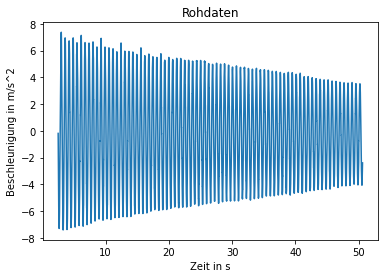

 --> 51 auto-correlation peaks found


In [8]:
if len(sys.argv)==2:
    fname = sys.argv[1]
else:
    fname = "HandyPendel.csv"
print( '\n*==* script ' + sys.argv[0]+ ' executing \n',\
      '     processing file ' + fname )

hlines, data= ppk.readCSV(fname, nlhead=1)


t = data[0]
x = data[1]
y = data[2]
z = data[3]


#Frequenz bestimmen:
#1. Gleitendes Mittelwert
smooth = ppk.meanFilter(y,3)


plt.plot(t,y)
plt.title("Rohdaten")
plt.xlabel("Zeit in s")
plt.ylabel("Beschleunigung in m/s^2")
plt.show()


#2. Peakfinder 
auto = ppk.autocorrelate(y)
maximum = ppk.convolutionPeakfinder(auto, width = 3, th=0.66)
minimum = ppk.convolutionPeakfinder(-auto, width = 3 , th=0.66)
if len(maximum) > 1:
    print(" --> %i auto-correlation peaks found"%(len(maximum)))
    maximum[0]=0 # first peak is at 0 by construction
    ac_tp, ac_ap= np.array(t[maximum]), np.array(auto[maximum])
    ac_td, ac_ad= np.array(t[minimum]), np.array(auto[minimum])
else:
    print("*!!* not enough correlation peaks found")





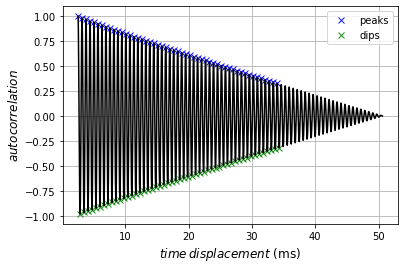

In [9]:

# 2. auto-correlation 
ax2=plt
ax2.plot(ac_tp, ac_ap, 'bx', alpha=0.9, label='peaks')
ax2.plot(ac_td, ac_ad, 'gx', alpha=0.9, label='dips')
ax2.plot(t, auto, 'k-')
ax2.xlabel('$time \, displacement$ (ms) ', size='large')
ax2.ylabel('$autocorrelation$', size='large')
ax2.legend(loc='best', numpoints=1, prop={'size':10})
#  ax2.set_yscale('log')
ax2.grid()
plt.show()





 --> Zeitdifferenz Auto-Correlation: (0.62939 +/- 0.00032) s
 -->                                 (0.6295 +/- 0.00021) s


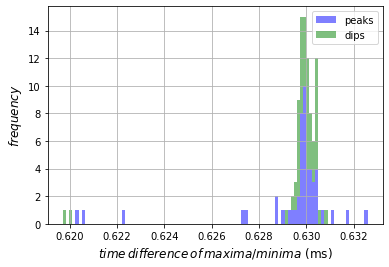

Frequenz: 1.5885737568307325
14.632463707983483
0.014923411297381891


In [10]:
# 3. analysis of auto-correlation function
ax3 = plt
ac_dtp = ac_tp[1:] - ac_tp[:-1] 
ac_dtd = ac_td[1:] - ac_td[:-1] 
bins=np.linspace(min(min(ac_dtp),min(ac_dtd)), max(max(ac_dtp), max(ac_dtd)), 100)
bc, be, _ = ax3.hist([ac_dtp, ac_dtd], bins, stacked = True, 
                         color=['b','g'], label=['peaks','dips'], alpha=0.5)
ax3.xlabel(r'$time \, difference \, of \, maxima/minima$ (ms)', size='large')
ax3.ylabel(r'$frequency$', size='large')
ax3.legend(loc='best', numpoints=1, prop={'size':10})
ax3.grid()
# analyis of histogram
m_dtp, s_dtp, sm_dtp = ppk.histstat(bc[0], be, pr=False)
m_dtd, s_dtd, sm_dtd = ppk.histstat(bc[1], be, pr=False)

print(" --> Zeitdifferenz Auto-Correlation: (%.5g +/- %.2g) s"%(m_dtp, sm_dtp)) 
print(" -->                                 (%.5g +/- %.2g) s"%(m_dtd, sm_dtd))

plt.show()


#Berechnung von D:
Frequenz = 1/m_dtd
m = 0.14174 + 0.01540/3
D = (Frequenz*2*np.pi)**2*m
print("Frequenz:",Frequenz)
print(D)


#Fehlerrechnung:  wurzel( (dD/dt *sigma_f)^2 + (dD/dM *sigma_m)^2 + (dD/dm_F *sigma_m)^2)
sigma = np.sqrt((2*1/m_dtd**3*m*4*np.pi**2*sm_dtp)**2 + ((Frequenz*2*np.pi)**2*0.14174*0.0001)**2 + ((Frequenz*2*np.pi)**2*0.01540/3*0.0001)**2)

print(sigma)


SyntaxError: invalid character in identifier (<ipython-input-12-cc53c4a53a36>, line 1)